In [1]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import warnings

import sys
sys.path.insert(0, '../')

from dynamical_model import DynamicalModel

## default values to test with
r_eff = 1.85
theta_e = 1.63
gamma = 1.95

## test single aperture calculation

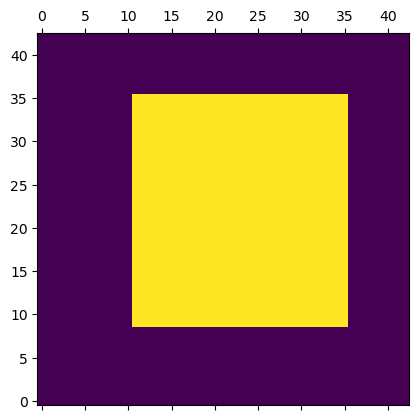

In [2]:
binning = np.zeros((43, 43))

w = 10
binning[22-3-w:22+4+w, 23-2-w:23+3+w] = np.ones((7+2*w, 5+2*w))

#binning = 1

plt.matshow(binning, origin='lower')

In [6]:
anisotropy_model = 'constant'
ani_param = 1


dyn_model = DynamicalModel(mass_model='powerlaw')

theta_e = 1.63317001e+00
gamma = 1.95886843e+00
q = 7.61476589e-01 
pa = 1.15742114e+02,
#1.87925701e+03, 9.06948652e+01, 8.71954746e-01, 
ani_param = 1.26886523e+00

    
# dyn_model.PSF_FWHM = 0.7 

def get_difference(
    theta_e = 1.63317001e+00,
    gamma = 1.95886843e+00,
    q = 7.61476589e-01,
    pa = 1.15742114e+02,
    #1.87925701e+03, 9.06948652e+01, 8.71954746e-01, 
    ani_param = 1.26886523e+00,
    psf_fwhm = 0.7,
    r_sersic_factor = 1.,
    shape='oblate', plot=False
    ):
    """
    """
    dyn_model.PSF_FWHM = psf_fwhm
    
#     dyn_model.R_sersic_1 = lambda : 2.3576 * r_sersic_factor
#     dyn_model.R_sersic_2 = lambda : 0.3302 * r_sersic_factor
    
    np.random.seed(2)
    a, _ = dyn_model.compute_jampy_v_rms_model([theta_e, gamma, 1], 
                                            pa=121, inclination=90,
                                            ani_param=ani_param,
                                            anisotropy_model=anisotropy_model,
                                            supersampling_factor=5,
                                            voronoi_bins=binning-1 if plot is False else None,
                                            do_convolve=True,
                                            q_light=1, shape=shape, moment='zz'                                
                                           )

    np.random.seed(2)
    b, _ = dyn_model.compute_jampy_v_rms_model([theta_e, gamma, q], 
                                            pa=121, inclination=90,
                                            ani_param=ani_param,
                                            anisotropy_model=anisotropy_model,
                                            supersampling_factor=5,
                                            voronoi_bins=binning-1 if plot is False else None,
                                            do_convolve=True,
                                            q_light=q, shape=shape, moment='zz'                               
                                           )
    
        
    if plot:
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))
        #axes = [axes]

        def plot_mat(arr, i, cmap='viridis', vmax=440, vmin=170):
            divider = make_axes_locatable(axes[i])
            im = axes[i].matshow(arr, origin='lower', cmap=cmap, vmax=vmax, vmin=vmin)
            cax = divider.append_axes('right', size='5%', pad=0.05)
            fig.colorbar(im, cax=cax, orientation='vertical', label=r'$\sigma_{\rm los}$ (km/s)')

        #cbar = axes[0].matshow(a[0], origin='lower')
        #cbar = axes[1].matshow(b[0], origin='lower')
        #plt.colorbar(cbar)

        #cbar = axes[2].matshow(a[0] - b[0], origin='lower', cmap='RdBu')
        #plt.colorbar(cbar)
        plot_mat(a.reshape((43, 43)), 0, cmap='viridis', vmax=np.max(b), vmin=np.min(b))
        plot_mat(b.reshape((43, 43)), 1, cmap='viridis', vmax=np.max(b), vmin=np.min(b))
        plot_mat(b.reshape((43, 43)) - a.reshape((43, 43)), 2, cmap='RdBu_r', 
                 vmax=np.max(b)*0.1, vmin=-np.max(b)*0.1)

        axes[0].set_title('spherical')
        axes[1].set_title('{}'.format(shape))
        axes[2].set_title('{} - spherical'.format(shape))

        fig.tight_layout()
    
    return ((b - a)/b)[0]

### changing q

In [8]:
qs = np.linspace(0.6, 1., 10)

diffs_q_oblate = []
diffs_q_prolate = []

for q in qs:
    diffs_q_oblate.append(get_difference(q=q))
    diffs_q_prolate.append(get_difference(q=q, shape='prolate'))

Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 

0.8 oblate
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`


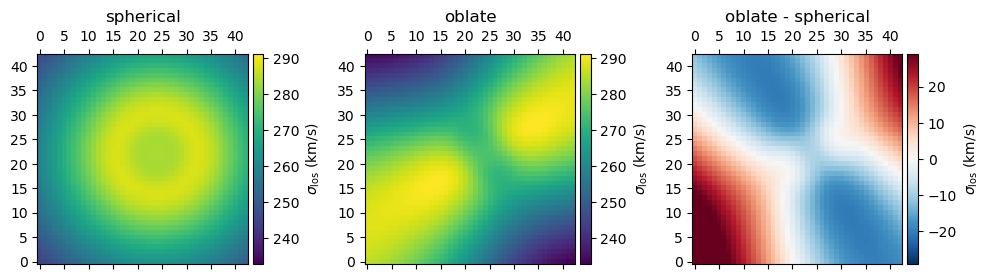

0.8 prolate
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`


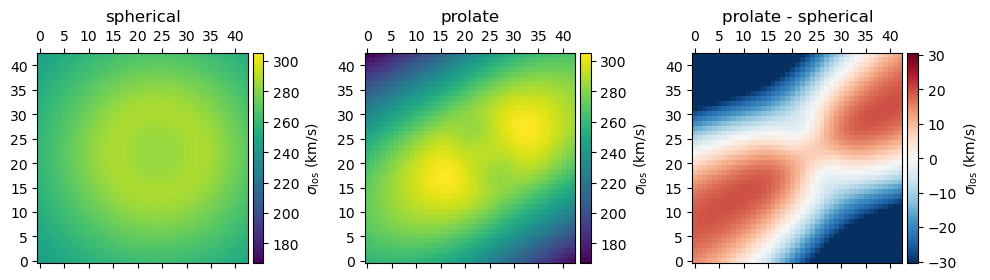

0.8500000000000001 oblate
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`


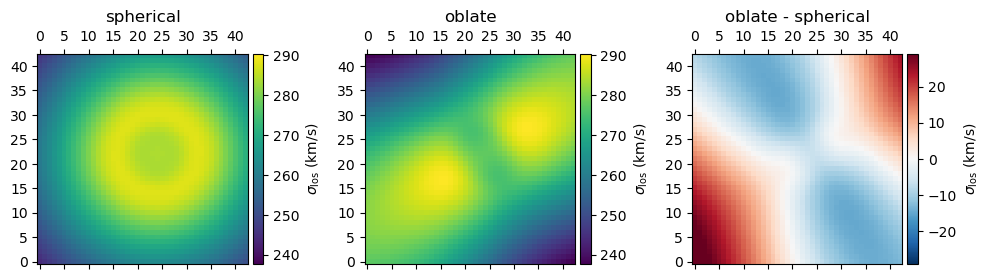

0.8500000000000001 prolate
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`


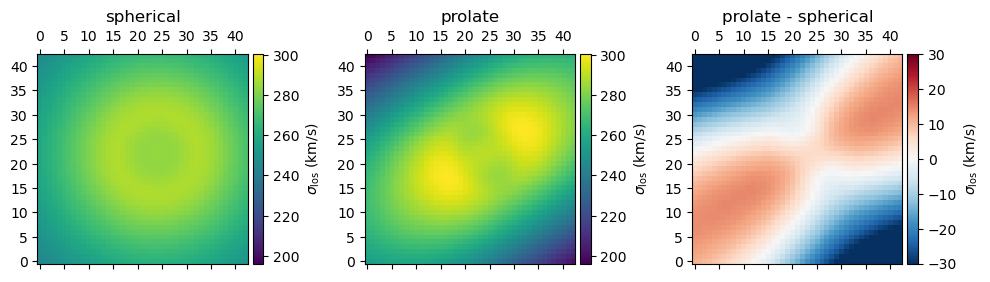

0.9000000000000001 oblate
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`


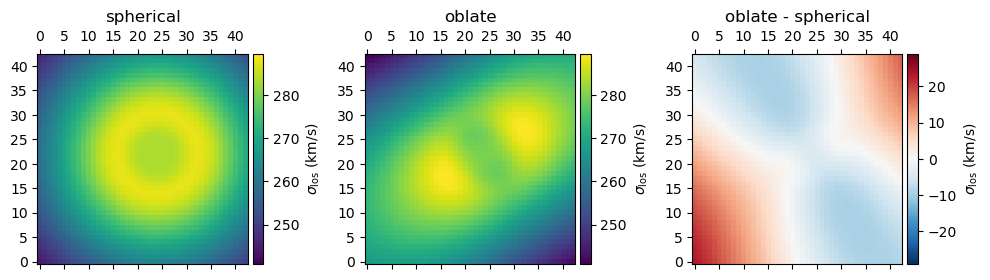

0.9000000000000001 prolate
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`


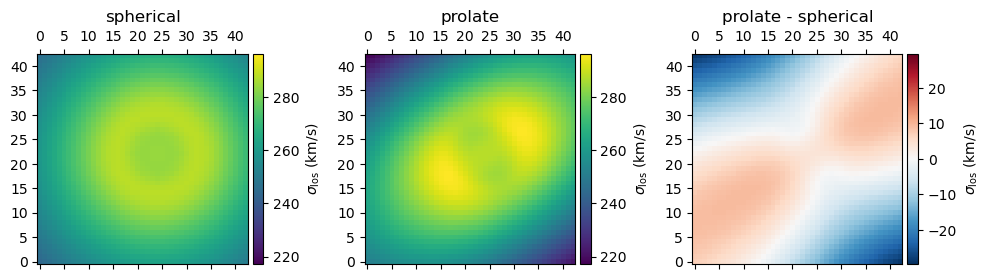

0.9500000000000002 oblate
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`


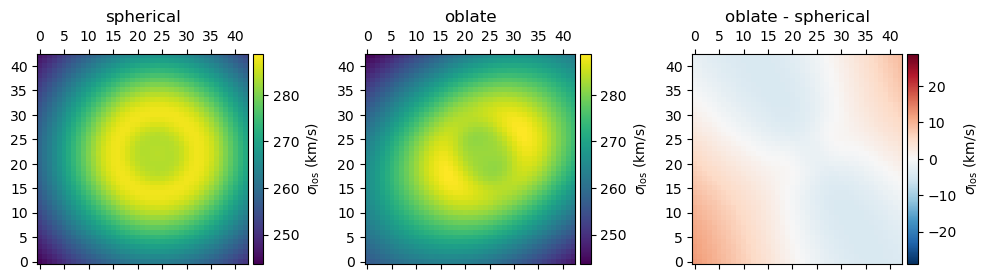

0.9500000000000002 prolate
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`


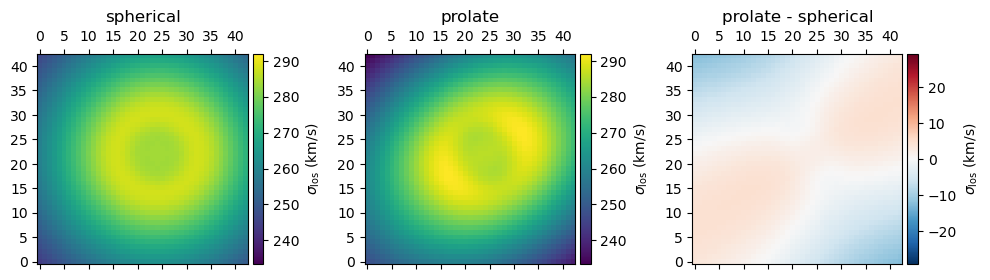

1.0000000000000002 oblate
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`


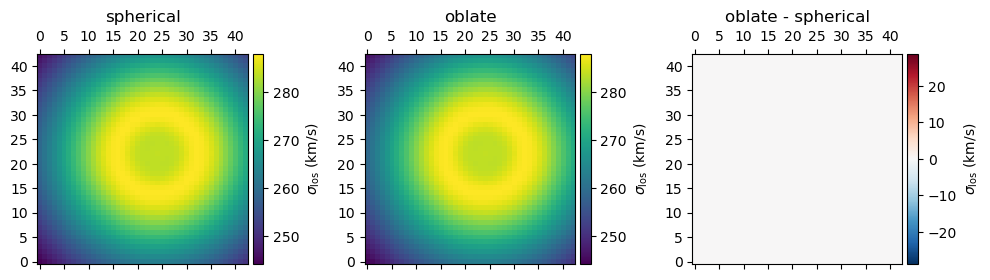

1.0000000000000002 prolate
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`


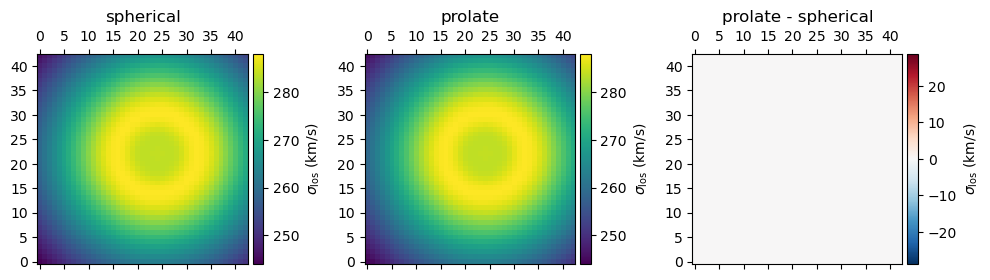

In [9]:
qs = np.arange(0.8, 1.01, 0.05)

for q in qs: #[::-1]:
    print(q, 'oblate')
    get_difference(q=q, plot=True);
    plt.show()
    print(q, 'prolate')
    get_difference(q=q, shape='prolate', plot=True);
    plt.show()

In [7]:
dyn_model.get_double_sersic_kwargs(is_shperical=False)

[{'amp': 446.3016376710391,
  'R_sersic': 0.29752746839984234,
  'n_sersic': 1.5838030506570118,
  'center_x': -0.4371,
  'center_y': 0.1457,
  'e1': 0.04441774942970639,
  'e2': -0.07046318476502476},
 {'amp': 33.18291943338763,
  'R_sersic': 2.425074529743544,
  'n_sersic': 1.1006245707693065,
  'center_x': -0.4371,
  'center_y': 0.1457,
  'e1': 0.038779195724296625,
  'e2': -0.06151832698512825}]

ValueError: x and y must have same first dimension, but have shapes (5,) and (10,)

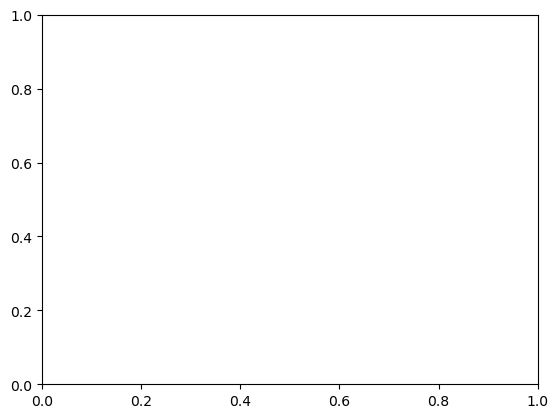

In [10]:
plt.plot(qs, np.array(diffs_q_oblate)*100, label='oblate')
plt.plot(qs, np.array(diffs_q_prolate)*100, label='prolate')

plt.title('ellipticity')
plt.xlabel('q')
plt.axhline(0, c='k')
plt.ylabel(r'$\Delta v_{\rm rms}$ (%)')
plt.legend()

### scaling both r_eff and theta_e

In [77]:
scaling_factor = np.linspace(0.5, 2, 10)

diffs_scaling_oblate = []
diffs_scaling_prolate = []

for s in scaling_factor:
    diffs_scaling_oblate.append(get_difference(theta_e=theta_e*s, r_sersic_factor=s))
    diffs_scaling_prolate.append(get_difference(theta_e=theta_e*s, r_sersic_factor=s, shape='prolate'))

Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
oblate
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
oblate
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
[1.001001 1.001001 1.001001 1.001001 1.001001 1.001001 1.001001 1.001001
 1.001001 1.001001 1.001001 1.001001 1.001001 1.001001 1.001001 1.001001
 1.001001 1.001001]
prolate
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
[1.31323801 1.31323801 1.31323801 1.31323801 1.31323801 1.31323801
 1.31323801 1.31323801 1.31323801 1.31323801 1.31323801 1.31323801
 1.31323801 1.31323801 1.31323801 1.31323801 1.31323801 1.31323801]
prolate
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
oblate
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
oblate
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
[1.001001 1.001001 1.001001 1.001001 1.001001 1.001001 1

In [10]:
plt.plot(scaling_factor, np.array(diffs_scaling_oblate)*100, label='oblate')
plt.plot(scaling_factor, np.array(diffs_scaling_prolate)*100, label='prolate')
plt.title('scaling')
plt.xlabel('scale')
plt.ylabel(r'$\Delta v_{\rm rms}$ (%)')
plt.legend()

NameError: name 'diffs_scaling_oblate' is not defined

### only scaling r_sersic

In [9]:
scaling_factor = np.linspace(0.45, 2, 10)

diffs_r_eff_oblate = []
diffs_r_eff_prolate = []

for s in scaling_factor:
    diffs_r_eff_oblate.append(get_difference(r_sersic_factor=s))
    diffs_r_eff_prolate.append(get_difference(r_sersic_factor=s, shape='prolate'))

Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`


KeyboardInterrupt: 

In [ ]:
plt.plot(scaling_factor, np.array(diffs_r_eff_oblate)*100, label='oblate')
plt.plot(scaling_factor, np.array(diffs_r_eff_prolate)*100, label='prolate')

plt.title('r_eff scaling')
plt.xlabel('scale')
plt.ylabel(r'$\Delta v_{\rm rms}$ (%)')
plt.legend()

### changing beta

In [57]:
betas = np.linspace(-0.4, .4, 10)

diffs_betas = []

for b in betas:
    diffs_betas.append(get_difference(ani_param=np.sqrt(1 - b)))

Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
[1.31323801 1.31323801 1.31323801 1.31323801 1.31323801 1.31323801
 1.31323801 1.31323801 1.31323801 1.31323801 1.31323801 1.31323801
 1.31323801 1.31323801 1.31323801 1.31323801 1.31323801 1.31323801
 1.31323801 1.31323801]
prolate
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
oblate
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
[1.31323801 1.31323801 1.31323801 1.31323801 1.31323801 1.31323801
 1.31323801 1.31323801 1.31323801 1.31323801 1.31323801 1.31323801
 1.31323801 1.31323801 1.31323801 1.31323801 1.31323801 1.31323801
 1.31323801 1.31323801]
prolate
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
oblate
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
[1.31323801 1.31323801 1.31323801 1.31323801 1.31323801 1.31323801
 1.31323801 1.31323801 1.31323801 1.31323801 1.31323801 1.31323801
 1.313

Text(0, 0.5, '$\\Delta v_{\\rm rms}$ (%)')

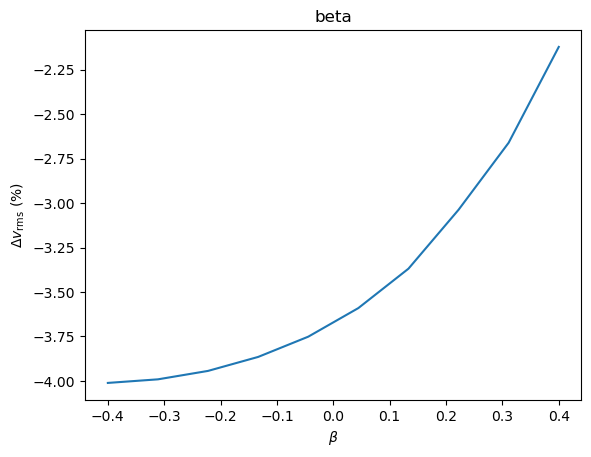

In [58]:
plt.plot(betas, np.array(diffs_betas)*100)

plt.title('beta')
plt.xlabel(r'$\beta$')

plt.ylabel(r'$\Delta v_{\rm rms}$ (%)')